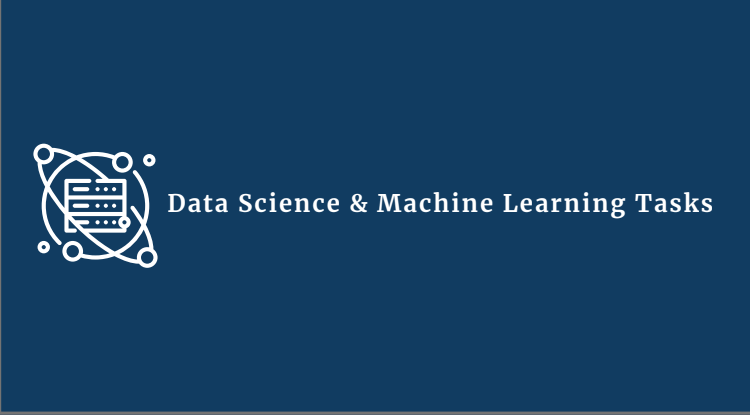

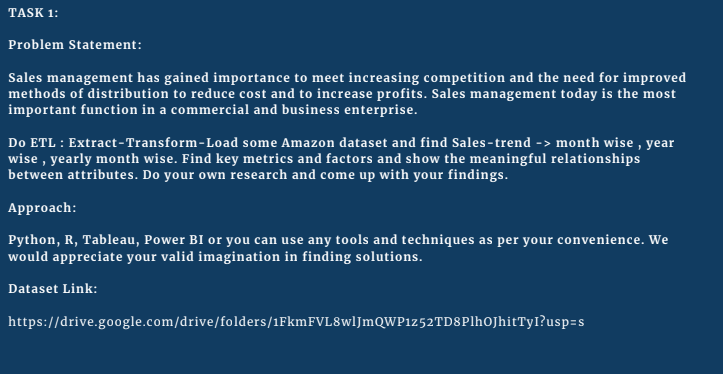

TEAM NAME : ACHIEVERS

GROUP MEMBERS :

G.HARINISRI

MADASU DEEPIKA 

PRINCE K

LANGUAGE USED : PYTHON 

SOFTWARE USED : GOOGLE COLAB

**IMPORTING THE REQUIRED LIBRARIES** 

In [13]:
# Data Manipulation
import pandas as pd
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORTING THE DATASET**

In [12]:
df = pd.read_excel('/content/drive/MyDrive/SALESDATA.xls')
df

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,Unnamed: 20,Unnamed: 21
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,200015,2017-04-30,237.91,0.00,0.00,237.91,237.910000,1,184,EA,NaN,U/M = unit of measure
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,200245,2017-07-14,456.17,824.96,0.00,456.17,456.170000,1,127,EA,NaN,NaN
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,213157,2017-10-16,438.93,548.66,0.00,438.93,438.930000,1,127,EA,NaN,EA = each
3,10002489,2017-06-03,-211.75,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.00,200107,2017-06-03,211.75,0.00,0.00,211.75,211.750000,1,160,EA,NaN,NaN
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,203785,2017-05-28,89248.66,185876.60,0.00,89248.66,196.150901,455,124,SE,NaN,SE = some SI unit like kgs or gallons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65277,10017638,2018-03-21,505.78,2018-03-21,226497,P01,13447,High Top Oranges,8000,119.52,320895,2018-03-21,569.90,1075.68,239.95,329.95,63.322222,9,180,EA,NaN,NaN
65278,10017638,2018-03-21,410.75,2018-03-21,226497,P01,25906,Landslide White Sugar,38000,436.78,320895,2018-03-21,462.81,873.56,423.55,39.26,231.405000,2,180,EA,NaN,NaN
65279,10017638,2018-03-21,876.16,2018-03-21,226497,P01,61856,Moms Potato Salad,227001,232.92,320895,2018-03-21,987.20,1863.36,574.00,413.20,123.400000,8,180,EA,NaN,NaN
65280,10017638,2018-03-21,24226.77,2018-03-21,226498,P01,17801,Better Fancy Canned Sardines,1000,1431.23,320907,2018-03-21,27297.51,51524.28,16188.90,11108.61,758.264167,36,180,EA,NaN,NaN


**PERFORMING DATA AUDIT**

In [15]:
# First five rows of dataset
df.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,Unnamed: 20,Unnamed: 21
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,200015,2017-04-30,237.91,0.00,0.0,237.91,237.910000,1,184,EA,NaN,U/M = unit of measure
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,200245,2017-07-14,456.17,824.96,0.0,456.17,456.170000,1,127,EA,NaN,NaN
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,213157,2017-10-16,438.93,548.66,0.0,438.93,438.930000,1,127,EA,NaN,EA = each
3,10002489,2017-06-03,-211.75,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.00,200107,2017-06-03,211.75,0.00,0.0,211.75,211.750000,1,160,EA,NaN,NaN
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,203785,2017-05-28,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE,NaN,SE = some SI unit like kgs or gallons


In [16]:
#Last five rows of the dataset
df.tail()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,Unnamed: 20,Unnamed: 21
65277,10017638,2018-03-21,505.78,2018-03-21,226497,P01,13447,High Top Oranges,8000,119.52,320895,2018-03-21,569.90,1075.68,239.95,329.95,63.322222,9,180,EA,NaN,NaN
65278,10017638,2018-03-21,410.75,2018-03-21,226497,P01,25906,Landslide White Sugar,38000,436.78,320895,2018-03-21,462.81,873.56,423.55,39.26,231.405000,2,180,EA,NaN,NaN
65279,10017638,2018-03-21,876.16,2018-03-21,226497,P01,61856,Moms Potato Salad,227001,232.92,320895,2018-03-21,987.20,1863.36,574.00,413.20,123.400000,8,180,EA,NaN,NaN
65280,10017638,2018-03-21,24226.77,2018-03-21,226498,P01,17801,Better Fancy Canned Sardines,1000,1431.23,320907,2018-03-21,27297.51,51524.28,16188.90,11108.61,758.264167,36,180,EA,NaN,NaN
65281,10017638,2018-03-21,24479.26,2018-03-21,226498,P01,27550,Imagine Popsicles,4000,1084.61,320907,2018-03-21,27582.02,52061.28,14234.22,13347.80,574.625417,48,180,EA,NaN,NaN


In [17]:
# Shape of the dataset
df.shape

(65282, 22)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65282 non-null  int64         
 1   DateKey                           65282 non-null  datetime64[ns]
 2   Discount Amount                   65280 non-null  float64       
 3   Invoice Date                      65282 non-null  datetime64[ns]
 4   Invoice Number                    65282 non-null  int64         
 5   Item Class                        56993 non-null  object        
 6   Item Number                       65241 non-null  object        
 7   Item                              65282 non-null  object        
 8   Line Number                       65282 non-null  int64         
 9   List Price                        65282 non-null  float64       
 10  Order Number                      65282 non-nu

In [19]:
df.describe()

,CustKey,Discount Amount,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,Unnamed: 20
count,6.528200e+04,65280.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65281.000000,65282.000000,65282.000000,0.0
mean,1.001770e+07,1855.574835,216223.662020,23713.849790,514.693380,180583.064352,2852.038373,4707.473613,1660.979228,1191.059145,283.615913,45.084311,137.422398,NaN
std,7.176148e+03,9037.140888,94992.281866,32664.024053,449.189182,67593.871116,15164.342107,20696.443785,9556.485250,5860.787502,252.876719,429.661793,26.643936,NaN
min,1.000045e+07,-255820.800000,100012.000000,1000.000000,0.000000,100838.000000,200.010000,0.000000,0.000000,-3932.930000,-5000.000000,-1.000000,103.000000,NaN
25%,1.001272e+07,246.037500,117931.000000,3000.000000,181.560000,115321.000000,308.387500,561.040000,167.790000,129.950000,100.070000,2.000000,113.000000,NaN
50%,1.001966e+07,441.760000,222869.500000,12000.000000,325.190000,203702.000000,553.940000,998.160000,304.500000,246.490000,183.757500,3.000000,134.000000,NaN
75%,1.002351e+07,999.760000,314318.750000,32000.000000,803.860000,218576.000000,1280.042500,2315.040000,687.320000,579.530000,448.220000,8.000000,160.000000,NaN
max,1.002758e+07,343532.660000,332842.000000,344000.000000,2760.700000,321532.000000,555376.000000,632610.160000,366576.000000,188800.000000,6035.000000,16000.000000,185.000000,NaN


In [20]:
# Columns present in the dataset
df.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Class', 'Item Number', 'Item', 'Line Number',
       'List Price', 'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M', 'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')

**DATA CLEANING - PREPROCESSING THE DATASET**

In [21]:
# Dropping irrevalent columns
df.drop(['CustKey', 'DateKey', 'Invoice Number','Item Class', 'Item Number', 'Line Number', 
         'Order Number', 'Promised Delivery Date', 'Sales Rep', 'U/M', 'Unnamed: 20', 'Unnamed: 21'],
          axis=1, inplace=True)

**SUMMARY OF DATABASE**

In [22]:
# A concise summary of the database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Discount Amount                   65280 non-null  float64       
 1   Invoice Date                      65282 non-null  datetime64[ns]
 2   Item                              65282 non-null  object        
 3   List Price                        65282 non-null  float64       
 4   Sales Amount                      65282 non-null  float64       
 5   Sales Amount Based on List Price  65282 non-null  float64       
 6   Sales Cost Amount                 65282 non-null  float64       
 7   Sales Margin Amount               65282 non-null  float64       
 8   Sales Price                       65281 non-null  float64       
 9   Sales Quantity                    65282 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(1), ob

In [23]:
# Checking missing values
df.isnull().sum()

Discount Amount                     2
Invoice Date                        0
Item                                0
List Price                          0
Sales Amount                        0
Sales Amount Based on List Price    0
Sales Cost Amount                   0
Sales Margin Amount                 0
Sales Price                         1
Sales Quantity                      0
dtype: int64

In [24]:
# Dropping rows with null values
df.dropna(inplace=True)

In [25]:
# Getting descriptive statistics summary
df.describe()

,Discount Amount,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity
count,65280.000000,65280.000000,65280.000000,65280.000000,65280.000000,65280.000000,65280.000000,65280.000000
mean,1855.574835,514.709149,2852.043002,4707.617837,1661.030116,1191.012887,283.696851,45.085708
std,9037.140888,449.187029,15164.569043,20696.744425,9556.627220,5860.857507,252.031660,429.668301
min,-255820.800000,0.000000,200.010000,0.000000,0.000000,-3932.930000,0.337341,1.000000
25%,246.037500,181.560000,308.380000,561.040000,167.790000,129.947500,100.070000,2.000000
50%,441.760000,325.190000,553.940000,998.160000,304.530000,246.490000,183.758250,3.000000
75%,999.760000,803.860000,1279.987500,2316.630000,687.400000,579.390000,448.220000,8.000000
max,343532.660000,2760.700000,555376.000000,632610.160000,366576.000000,188800.000000,6035.000000,16000.000000


**EXPLORATORY DATA ANALYSIS**

In [26]:
df['Invoice Date'].min()

Timestamp('2017-01-01 00:00:00')

In [27]:
df['Invoice Date'].max()

Timestamp('2019-12-31 00:00:00')

**MONTH - WISE SALES**

In [28]:
# Getting monthwise  from dataset
df['Monthly'] = df['Invoice Date'].apply(lambda x: x.strftime('%m'))

In [29]:
# Grouping Sales Monthwise
df_trend_monthly = df.groupby('Monthly').sum()['Sales Price'].reset_index()
print(df_trend_monthly)

   Monthly   Sales Price
0       01  1.758747e+06
1       02  1.839655e+06
2       03  2.059078e+06
3       04  1.128440e+06
4       05  1.495986e+06
5       06  1.538435e+06
6       07  1.265654e+06
7       08  1.350924e+06
8       09  1.577823e+06
9       10  1.482457e+06
10      11  1.441628e+06
11      12  1.580902e+06


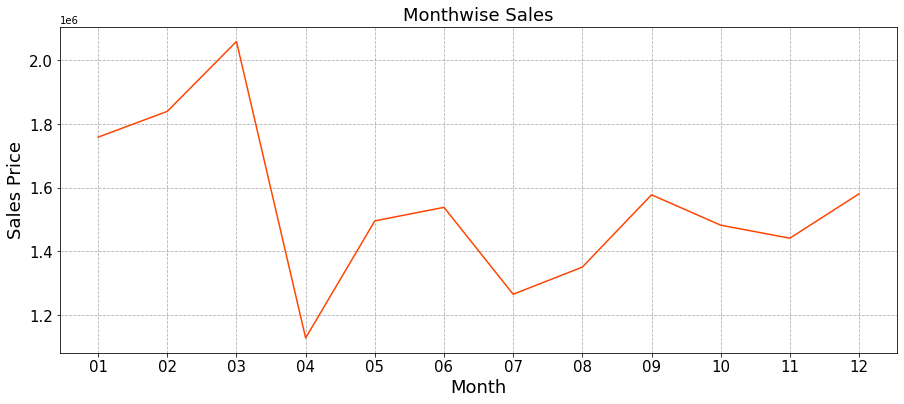

In [30]:
# Setting the figure size
plt.figure(figsize = (15,6))
plt.plot(df_trend_monthly['Monthly'], df_trend_monthly['Sales Price'], color='#FF4500')
plt.grid(linestyle='--')
plt.title("Monthwise Sales", fontsize=18)
plt.xticks(size=8, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Month", fontsize=18)
plt.ylabel("Sales Price",fontsize=18)
plt.show()

**YEAR - WISE  SALES**

In [31]:
# Getting yearwise from dataset
df['Yearly'] = df['Invoice Date'].apply(lambda x: x.strftime('%y'))

In [32]:
# Grouping Sales yearwise
df_trend_yearly = df.groupby('Yearly').sum()['Sales Price'].reset_index()
print(df_trend_yearly)

  Yearly   Sales Price
0     17  8.773676e+06
1     18  1.947338e+06
2     19  7.798717e+06


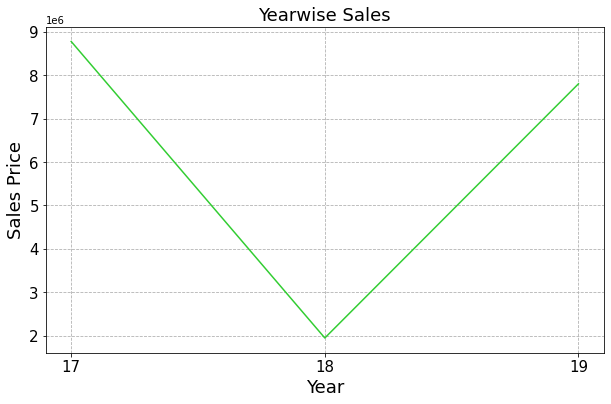

In [33]:
# Setting the figure size
plt.figure(figsize = (10,6))
plt.plot(df_trend_yearly['Yearly'], df_trend_yearly['Sales Price'], color='#32CD32')
plt.grid(linestyle='--')
plt.title("Yearwise Sales", fontsize=18)
plt.xticks(size=8, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Sales Price",fontsize=18)
plt.show()

**YEARLY MONTH WISE SALES**

In [34]:
# Getting yearly monthwise from dataset
df['Month_Year'] = df['Invoice Date'].apply(lambda x: x.strftime('%y-%m'))

In [35]:
# Grouping Sales yearly Monthwise
df_trend = df.groupby('Month_Year').sum()['Sales Price'].reset_index()
print(df_trend)

   Month_Year    Sales Price
0       17-01  781317.138966
1       17-02  600460.161869
2       17-03  741311.980741
3       17-04  535719.783362
4       17-05  804600.227856
5       17-06  855540.174847
6       17-07  607703.344621
7       17-08  696506.820155
8       17-09  876228.847969
9       17-10  739766.851958
10      17-11  763801.268917
11      17-12  770718.976202
12      18-01  706622.651847
13      18-02  620099.987458
14      18-03  620615.304779
15      19-01  270807.438237
16      19-02  619094.828742
17      19-03  697150.567644
18      19-04  592720.646033
19      19-05  691385.402197
20      19-06  682895.080782
21      19-07  657950.342085
22      19-08  654417.644110
23      19-09  701594.344720
24      19-10  742690.282290
25      19-11  677826.884126
26      19-12  810183.439223


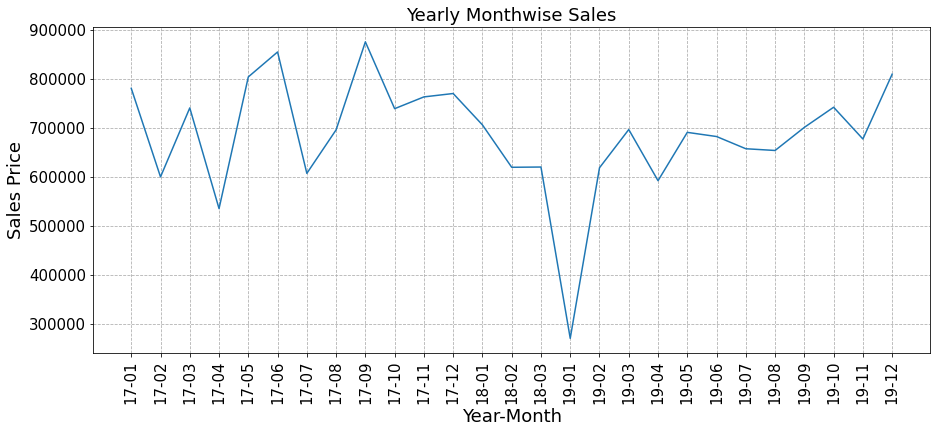

In [36]:
# Setting the figure size
plt.figure(figsize = (15,6))
plt.plot(df_trend['Month_Year'], df_trend['Sales Price'])
plt.grid(linestyle='--')
plt.title("Yearly Monthwise Sales", fontsize=18)
plt.xticks(rotation='vertical', size=8, fontsize=15)
# plt.xticks(size=8, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Year-Month", fontsize=18)
plt.ylabel("Sales Price",fontsize=18)
plt.show()

**CORRELATION**

In [37]:
# Finding the Correlation for all the attributes in the dataset
correlation = df.corr()
print(correlation)

                                  Discount Amount  ...  Sales Quantity
Discount Amount                          1.000000  ...        0.085401
List Price                               0.075184  ...       -0.095847
Sales Amount                             0.425852  ...        0.820925
Sales Amount Based on List Price         0.748668  ...        0.638784
Sales Cost Amount                        0.392464  ...        0.859719
Sales Margin Amount                      0.461916  ...        0.722243
Sales Price                              0.046898  ...       -0.091779
Sales Quantity                           0.085401  ...        1.000000

[8 rows x 8 columns]


**VISUALISING THE CORRELATION BY HEATMAP**

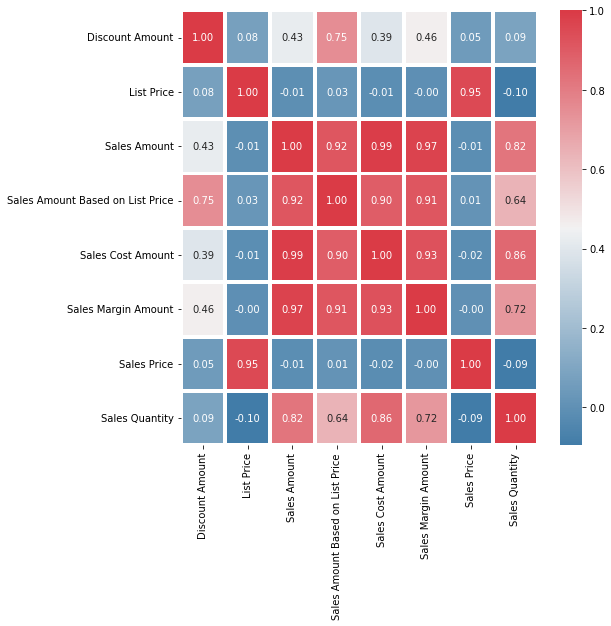

In [38]:
# Drawing the Heatmap for the correalation
fig, ax =plt.subplots(figsize=(8,8))
dropself = np.zeros_like(correlation)
dropself[np.triu_indices_from(dropself)] = True
colormap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(correlation, cmap=colormap, linewidth=3, annot=True, fmt=".2f")
plt.show()

**TOP 10 ITEMS BY SALES**

In [39]:
# Grouping Item Column by Sales Price
Item_Sales = pd.DataFrame(df.groupby('Item').sum()['Sales Price'])

In [40]:
# Sorting Item_Sales Column
Item_Sales = Item_Sales.sort_values('Sales Price', ascending=False)

In [41]:
# Top 10 Items by Sales
Item_Sales[:10]

,Sales Price
Item,
Better Fancy Canned Sardines,1.263262e+06
Red Spade Foot-Long Hot Dogs,9.373662e+05
Discover Manicotti,7.652226e+05
Ebony Prepared Salad,7.235575e+05
Imagine Popsicles,6.937473e+05
Atomic Mint Chocolate Bar,5.782172e+05
Red Spade Turkey Hot Dogs,5.400774e+05
Moms Sliced Turkey,4.878333e+05
Bravo Large Canned Shrimp,4.718499e+05


**TOP 10 MOST SELLING ITEMS**

In [42]:
# Grouping Item Column by Sales Quantity
Most_Sell_Items = pd.DataFrame(df.groupby('Item').sum()['Sales Quantity'])

In [43]:
# Sorting Most_Sell_Items Column
Most_Sell_Items = Most_Sell_Items.sort_values('Sales Quantity', ascending=False)

In [44]:
# Top 10 Most Selling products
Most_Sell_Items[:10]

,Sales Quantity
Item,
Better Large Canned Shrimp,590343
High Top Dried Mushrooms,377259
Better Canned Tuna in Oil,266996
Walrus Chardonnay,212022
Red Spade Pimento Loaf,163296
Even Better String Cheese,105559
Landslide Hot Chocolate,98465
Golden Frozen Broccoli,48040
Tell Tale Red Delcious Apples,31120


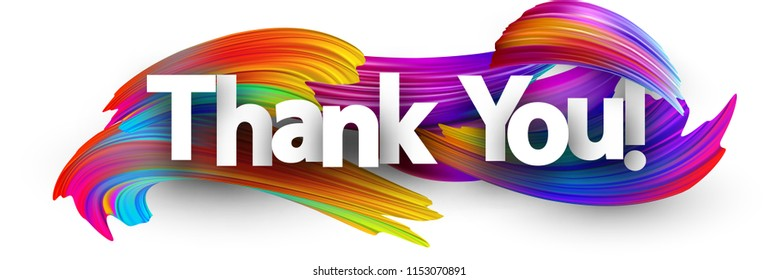